# Multiple Linear Regression in Python

## Importing the libraries (numpy,pandas,sklearn,matplotlib)

> Indented block



In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset (Lateral Acceleration)

In [170]:
dataset = pd.read_csv('DATA.csv',  engine='python')
dataset

,Time (in seconds),Vehicle�s speed (in m/s),Engine Load (% of max power),Total Acceleration (m/s^2),Engine RPM,Pitch,Lateral Acceleration (m/s^2)
0,0.020,0.000000,0.0,0.00000,0.00,-0.32371,0.000000e+00
1,0.027,0.000000,0.0,0.00000,0.00,-0.33391,0.000000e+00
2,0.037,0.000000,0.0,0.00000,0.00,-0.34420,0.000000e+00
3,0.047,0.000000,0.0,0.00000,0.00,-0.35457,0.000000e+00
4,0.057,0.000000,0.0,0.00000,0.00,-0.36502,0.000000e+00
...,...,...,...,...,...,...,...
97134,971.440,0.000217,3.1,0.31351,746.60,1.83730,1.090000e-07
97135,971.450,0.000352,3.1,0.31302,747.03,1.83800,1.760000e-07
97136,971.460,0.001761,3.1,0.31230,747.46,1.83880,-4.400000e-06
97137,971.470,0.003171,3.1,0.31139,747.89,1.83950,-7.930000e-06


In [169]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [171]:
clean_dataset(dataset)

,Time (in seconds),Vehicle�s speed (in m/s),Engine Load (% of max power),Total Acceleration (m/s^2),Engine RPM,Pitch,Lateral Acceleration (m/s^2)
0,0.020,0.000000,0.0,0.00000,0.00,-0.32371,0.000000e+00
1,0.027,0.000000,0.0,0.00000,0.00,-0.33391,0.000000e+00
2,0.037,0.000000,0.0,0.00000,0.00,-0.34420,0.000000e+00
3,0.047,0.000000,0.0,0.00000,0.00,-0.35457,0.000000e+00
4,0.057,0.000000,0.0,0.00000,0.00,-0.36502,0.000000e+00
...,...,...,...,...,...,...,...
97133,971.430,-0.001977,3.1,0.31375,746.17,1.83660,-2.970000e-06
97134,971.440,0.000217,3.1,0.31351,746.60,1.83730,1.090000e-07
97135,971.450,0.000352,3.1,0.31302,747.03,1.83800,1.760000e-07
97136,971.460,0.001761,3.1,0.31230,747.46,1.83880,-4.400000e-06


# **Spliting Dependent and Independent variable**

In [172]:
X = dataset.iloc[:,0:-1].values.round(decimals=2)
y = dataset.iloc[:,-1:].values.round(decimals=2)
X

array([[ 2.00e-02,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, -3.20e-01],
       [ 3.00e-02,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, -3.30e-01],
       [ 4.00e-02,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, -3.40e-01],
       ...,
       [ 9.71e+02,  0.00e+00,  3.10e+00,  3.10e-01,  7.47e+02,  1.84e+00],
       [ 9.71e+02,  0.00e+00,  3.10e+00,  3.10e-01,  7.47e+02,  1.84e+00],
       [ 9.71e+02,  0.00e+00,  3.10e+00,  3.10e-01,  7.48e+02,  1.84e+00]])

In [173]:
y

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [ 0.],
       [-0.],
       [-0.]])

## Encoding categorical data

In [174]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,0:-1])
X[:,0:-1]=imputer.transform(X[:,0:-1])

In [175]:
imputer.fit_transform(y[:,0:])
y[:,0:]=imputer.transform(y[:,0:])

In [176]:
print(X)

[[ 2.00e-02  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -3.20e-01]
 [ 3.00e-02  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -3.30e-01]
 [ 4.00e-02  0.00e+00  0.00e+00  0.00e+00  0.00e+00 -3.40e-01]
 ...
 [ 9.71e+02  0.00e+00  3.10e+00  3.10e-01  7.47e+02  1.84e+00]
 [ 9.71e+02  0.00e+00  3.10e+00  3.10e-01  7.47e+02  1.84e+00]
 [ 9.71e+02  0.00e+00  3.10e+00  3.10e-01  7.48e+02  1.84e+00]]


In [177]:
print(y)

[[ 0.]
 [ 0.]
 [ 0.]
 ...
 [ 0.]
 [-0.]
 [-0.]]


## Splitting the dataset into the Training set and Test set

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

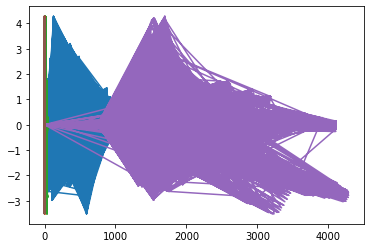

In [179]:
import matplotlib.pyplot as plt
plt.plot(X_train,y_train)
plt.show()

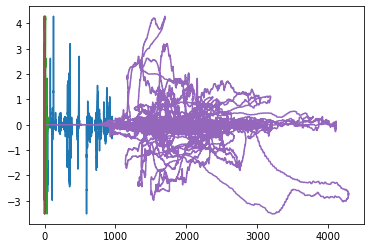

In [180]:
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.show()

## Training the Multiple Linear Regression model on the Training set

In [181]:
np.any(np.isnan(X))


False

In [182]:
np.all(np.isfinite(X))

True

In [183]:
np.all(np.isfinite(y))

True

In [184]:
np.any(np.isnan(y))

False

In [185]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
res=reg.fit(X_train,y_train)
res

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

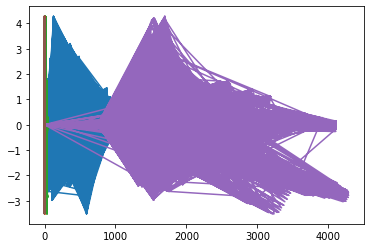

In [186]:
import matplotlib.pyplot as plt
plt.plot(X_train,y_train)
plt.show()

## Predicting the Test set results

In [187]:
y_p = reg.predict(X_test)
y_p

array([[ 0.06],
       [ 0.03],
       [-0.24],
       ...,
       [ 0.07],
       [ 0.06],
       [-0.02]])

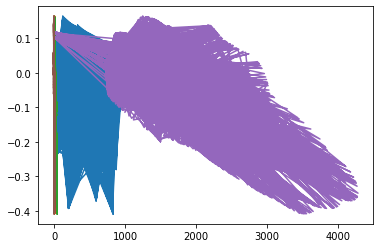

In [188]:
import matplotlib.pyplot as plt
plt.plot(X_test,y_p)
plt.show()

In [192]:
print(y,y_p)
y_pred = reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

[[ 0.]
 [ 0.]
 [ 0.]
 ...
 [ 0.]
 [-0.]
 [-0.]] [[ 0.06]
 [ 0.03]
 [-0.24]
 ...
 [ 0.07]
 [ 0.06]
 [-0.02]]
[[ 0.06 -0.1 ]
 [ 0.03  0.  ]
 [-0.24  0.15]
 ...
 [ 0.07  0.12]
 [ 0.06 -0.46]
 [-0.02  0.  ]]


array([[ 0.06, -0.1 ],
       [ 0.03,  0.  ],
       [-0.24,  0.15],
       ...,
       [ 0.07,  0.12],
       [ 0.06, -0.46],
       [-0.02,  0.  ]])

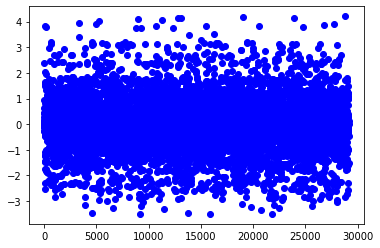

In [190]:
import matplotlib.pyplot as plt
plt.plot(y_test,'bo')
plt.show()

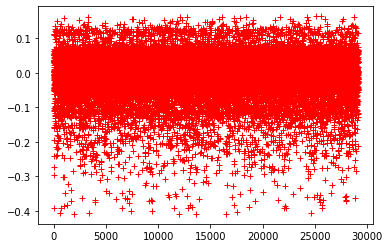

In [191]:
import matplotlib.pyplot as plt
plt.plot(y_pred,'r+')
plt.show()